## Aufgabe 2: Einfacher Passwort-Check
### Teil 1: Passwort-Komplexität prüfen
Schreibe und teste eine Funktion, die überprüft, ob ein Passwort mindestens acht Zeichen lang ist und sowohl Buchstaben als auch Zahlen enthält.

**Hinweise:** Du kannst mit `for <Zeichen> in <Zeichenkette>` über jedes Zeichen eines Strings iterieren und dieses einzeln überprüfen. Weiterhin kannst du [hier](https://docs.python.org/3/library/stdtypes.html#string-methods) nach geeigneten String-Methoden suchen, um die Zeichenart zu bestimmen.

In [6]:
def password_check(password):
    has_digit = False
    has_alpha = False
    for char in password:
        # Überprüft, ob es sich um eine Zahl handelt
        if char.isdigit():
            has_digit = True
        # Überprüft, ob es sich um einen Buchstaben handelt
        if char.isalpha():
            has_alpha = True
    return len(password) >= 8 and has_digit and has_alpha

password = "Password123"
if password_check(password) == True:
    print("The password is ok")
else:
    print("The password is not ok")

The password is ok


## Teil 2: Feedback zum Passwort
Erweitere die Funktion so, dass sie direktes Feedback dazu gibt, welche Kriterien nicht erfüllt sind.
Erstelle eine Passwortliste und teste die Funktion.

In [17]:
def password_feedback(password):
    has_len = True
    has_digit = False
    has_alpha = False
    if len(password) < 8:
        print("The password is too short.")
        has_len = False
    for char in password:
        if char.isdigit():
            has_digit = True
        if char.isalpha():
            has_alpha = True
    if not has_digit:
        print("The password needs at least one number.")
    if not has_alpha:
        print("The password needs at least one letter.")
    if has_len and has_digit and has_alpha:
        print("The password is ok.")

passwords = ["123456", "Password123", "abc", "123abc456", "StrongPW99"]
    
for pw in passwords:
    print(f"Password check for: {pw}")
    password_feedback(pw)
    print() # Um einen Zeilenumbruch einzufügen

Password check for: 123456
The password is too short.
The password needs at least one letter.

Password check for: Password123
The password is ok.

Password check for: abc
The password is too short.
The password needs at least one number.

Password check for: 123abc456
The password is ok.

Password check for: StrongPW99
The password is ok.



## Aufgabe 3: Einfache Datenanalyse
### Teil 1: Datenimport

Die Textdatei `imu_data` enthält Sensormessungen nach folgendem Format: `<Zeitstempel in Sekunden> <LAccelerometer_x> <LAccelerometer_y> <LAccelerometer_z> <LGyroskop_x> <LGyroskop_y> <LGyroskop_z> <LMagnetometer_x> <LMagnetometer_y> <LMagnetometer_z> <RAccelerometer_x> <RAccelerometer_y> <RAccelerometer_z> <RGyroskop_x> <RGyroskop_y> <RGyroskop_z> <RMagnetometer_x> <RMagnetometer_y> <RMagnetometer_z>`. `L` steht dabei für den linken Fuß, `R` für den rechten. Dies meint den Ort, an dem die Sensoren jeweils angebracht waren. 

Lies die Datei in eine geeignete Datenstruktur ein. Gib zur Überprüfung die erste Zeile und die Dimension (Anzahl Zeilen und Spalten aus).

**Anmerkungen:** Die Person ist während der Datenaufnahme gegangen. Accelerometer messen Linearbeschleunigungen, Gyroskope messen Winkelgeschwindigkeiten, Magnetometer messen Magnetfelder.

In [73]:
import numpy as np

# Einlesen der Daten
# Da die Daten durch Leerzeichen getrennt sind, ist der Standard-Delimiter ' ' passend
data = np.loadtxt("imu_data")

# Überprüfen der eingelesenen Daten
print("Erste Zeile:")
print(data[0,:])
print(f"Dimension: {data.shape}")

Erste Zeile:
[ 0.00000e+00  5.22969e+00 -4.72085e+00  7.03979e+00  1.43347e-02
  2.26721e-02  1.99680e-02 -7.89307e-01  5.70313e-01 -3.81592e-01
 -3.41607e+00 -5.00091e+00  7.69099e+00  8.71080e-04  3.54919e-03
  2.52092e-03 -4.68750e-02  3.69873e-01 -9.41162e-01]
Dimension: (21999, 19)


### Teil 2: Datenausfälle prüfen
Die Daten wurden mit 60 Hz erhoben. Prüfe quantitativ und qualitativ, ob es Datenausfälle gab.

**Hinweise:** Berechne jeweils die Differenz zum Vorgänger-Sample und schaue dir Minimum, Maximum und Mittelwert der Differenzen an. Zur qualitativen Prüfung kannst du die Differenzen plotten.

Max: 0.020000000000038654, Mean: 0.016666242385671427, Min: 0.012999999999976808


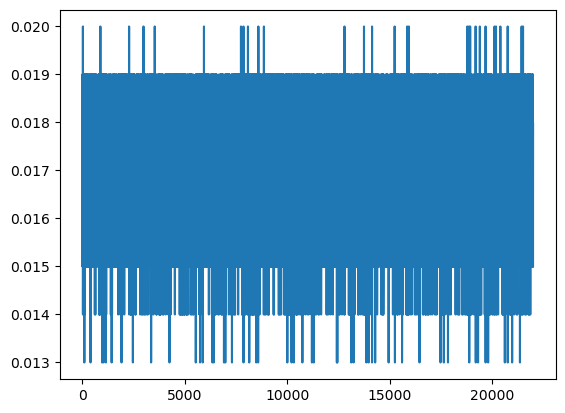

In [97]:
from matplotlib import pyplot

diffs = np.diff(data[:,0])
max_diff = np.max(diffs)
min_diff = np.min(diffs)
mean_diff = np.mean(diffs)
print(f"Max: {max_diff}, Mean: {mean_diff}, Min: {min_diff}")

pyplot.plot(diffs)